<a href="https://colab.research.google.com/github/CorleoneAppolonia/PMP-2024/blob/main/Lab9/ex_laborator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. **Explicatie**:

Am folosit PyMC pentru a calcula distributia a posteriori a numarului total de clienti, \( n \), intr-un magazin, in functie de numarul de clienti care cumpara (\( Y \)) si probabilitatea ca un client sa cumpere (\( \theta \)).


### **Observatii**:
1. **Efectul lui \( Y \):**
   - Daca \( Y \) creste, distributia a posteriori pentru \( n \) se deplaseaza spre valori mai mari.
   - Exemplu: Pentru \( Y = 10 \), \( n \) are o valoare mai mare comparativ cu \( Y = 5 \).

2. **Efectul lui ( theta \):**
   - Daca ( theta \) este mica (\( 0.2 \)), \( n \) trebuie sa fie mai mare pentru a explica acelasi \( Y \), deoarece probabilitatea de cumparare este scazuta.
   - Daca ( theta \) este mare (\( 0.5 \)), \( n \) poate fi mai mic, deoarece probabilitatea de cumparare este mai mare.






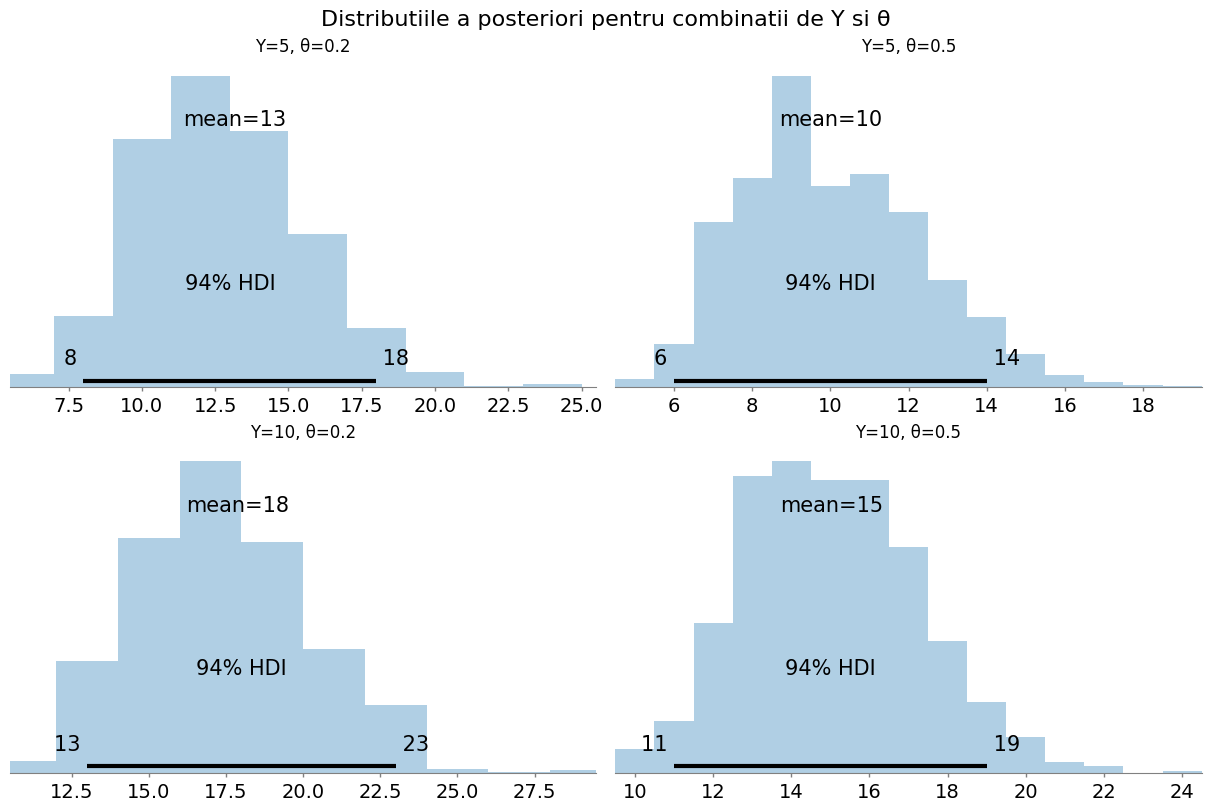

In [5]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

Y_values = [5, 10]
theta_values = [0.2, 0.5]

fig, axes = plt.subplots(len(Y_values), len(theta_values), figsize=(12, 8), constrained_layout=True)

for i, Y in enumerate(Y_values):
    for j, theta in enumerate(theta_values):
        with pm.Model() as model:
            # Distributia Poisson pentru numarul total de clienti
            n = pm.Poisson("n", mu=10)

            # Distributia Binomiala pentru Y
            Y_obs = pm.Binomial("Y_obs", n=n, p=theta, observed=Y)

            trace = pm.sample(1000, return_inferencedata=True, progressbar=False)
        az.plot_posterior(trace, var_names=["n"], ax=axes[i, j])
        axes[i, j].set_title(f"Y={Y}, θ={theta}")

plt.suptitle("Distributiile a posteriori pentru combinatii de Y si θ", fontsize=16)
plt.show()
